<a href="https://colab.research.google.com/github/Hybern8/Hybern8/blob/main/StatsRevisionRetakeExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instllation of R**

In [2]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
m=3*5
print(m)

[1] 15


# **Checking my skills on measures on central tendencies and measures of dispersion**

In [ ]:
%%R
data=read.csv('/content/diamonds.csv')
print(head(data))
x=data$depth
T=table(x)
m=mean(x); med=median(x); v=var(x); s=sd(x); mode=names(T)[which(T==max(T))]; IQR=IQR(x)
; range=max(x)-min(x)
header=c('mean','median','Variance','std dev','mode','IQR','Range')
values=c(m,med,v,s,mode,IQR,range)
rbind(header,values)

  X carat       cut color clarity depth table price length_mm width_mm depth_mm
1 1  0.23     Ideal     E     SI2  61.5    55   326      3.95     3.98     2.43
2 2  0.21   Premium     E     SI1  59.8    61   326      3.89     3.84     2.31
3 3  0.23      Good     E     VS1  56.9    65   327      4.05     4.07     2.31
4 4  0.29   Premium     I     VS2  62.4    58   334      4.20     4.23     2.63
5 5  0.31      Good     J     SI2  63.3    58   335      4.34     4.35     2.75
6 6  0.24 Very Good     J    VVS2  62.8    57   336      3.94     3.96     2.48
       [,1]               [,2]     [,3]               [,4]               [,5]  
header "mean"             "median" "Variance"         "std dev"          "mode"
values "61.6861466821886" "61.8"   "2.98608991319119" "1.72803064590626" "61.3"
       [,6]  [,7]   
header "IQR" "Range"
values "1.7" "15.2" 


## **Data Normalization - zscore**

In [ ]:
#zscore is used to normlize data and handling outliers within a dataset
#seee example below using the same diamod dataset
%%R
z=(x-m)/s
print(c(min(z),max(z)))
print(c(min(x),max(x)))

[1] -5.026616  3.769524
[1] 53.0 68.2


## **Running probability of Pr(AnB) etc**

In [ ]:
%%R
library(tidyverse)


✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
%%R
cars=read.csv('/content/mtcars.csv')
print(head(cars))
J=filter(cars,cars$cyl>4)
K=filter(cars,cars$gear<5)

#a pr(J) - the probability of J over the total number of data sets in mtcars
nJ=nrow(J); ncars=nrow(cars)
prJ=nJ/ncars
print(c('the probability of J is,', prJ))

#b pr(JnK) - the intersectin of J and K over the total number of dataset in mtcars
nAB=nrow(filter(cars,cars$cyl>4,cars$gear<5))
prJK=nAB/ncars
print(c('the probability of JnK is,', prJK))

              model  mpg cyl disp  hp drat    wt  qsec vs am gear carb
1         Mazda RX4 21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
2     Mazda RX4 Wag 21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
3        Datsun 710 22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
4    Hornet 4 Drive 21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
5 Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
6           Valiant 18.1   6  225 105 2.76 3.460 20.22  1  0    3    1
[1] "the probability of J is," "0.65625"                 
[1] "the probability of JnK is," "0.5625"                    


## **Conditional probability**

In [ ]:
%%R
#a
#example from the moodle on-demand lesson
#probability of x1==6 and x2==5 where x1=cyl and x2=gear
a=nrow(filter(cars,cars$cyl==6))
b=nrow(filter(cars,cars$gear==5))
pra=a/nrow(cars)
prb=b/nrow(cars)
print(pra)
print(prb)

[1] 0.21875
[1] 0.15625


In [ ]:
%%R
#b Pr(c|d)
c=nrow(filter(cars,cars$cyl>5))
d=nrow(filter(cars,cars$gear<4))
cd=nrow(filter(cars,cars$cyl>5,cars$gear<4))
Pr_d=d/nrow(cars)
Pr_cd=cd/nrow(cars)
Pr_cGivend=Pr_cd/Pr_d
print(Pr_cGivend)

[1] 0.9333333


In [ ]:
%%R
#knowledge check exercise from downloaded dataset from moodle
tdata=read.csv('/content/dataset-19372.csv')
head(tdata)
pWool=nrow(filter(tdata,tdata$wool=='A'))
ptension=nrow(filter(tdata,tdata$tension=='L'))

#a find p(wool=A)
PrW=pWool/nrow(tdata)
#b find p(tension=L)
PrT=ptension/nrow(tdata)
#c p(wool=A|tension=L)
WT=nrow(filter(tdata,tdata$wool=='A',tdata$tension=='L'))
PrWT=WT/nrow(tdata)
PrWgivenT=PrWT/PrT
print(head(tdata))
print(PrW)
print(PrT)
print(PrWT)
print(PrWgivenT)

  breaks wool tension
1     26    A       L
2     30    A       L
3     54    A       L
4     25    A       L
5     70    A       L
6     52    A       L
[1] 0.5
[1] 0.3333333
[1] 0.1666667
[1] 0.5


In [ ]:
#considering the dataset again but this time tension=M,H and wool=A
%%R
ptensions=nrow(filter(tdata,tdata$tension!='L'))
PrTs=ptensions/nrow(tdata)
WTs=nrow(filter(tdata,tdata$wool=='A',tdata$tension!='L'))
PrWTs=WTs/nrow(tdata)
PrWgivenTs=PrWTs/PrW #PrW is probability of wool in previous block of codes
print(PrTs)
print(PrWTs)
print(PrWgivenTs)

[1] 0.6666667
[1] 0.3333333
[1] 0.6666667


In [ ]:
#considering the swiss.csv dataset for some conditional probability exercises
%%R
swiss=read.csv('/content/swiss.csv')
print(head(swiss))
A=nrow(filter(swiss,swiss$Examination>10))
B=nrow(filter(swiss,swiss$Education>9))
#a
prA=A/nrow(swiss)
print(prA)
#b compute p(Bc) where Bc is complements of B
prB=B/nrow(swiss)
pBc=1-prB
print(pBc)
#c compute p(B|A)
AB=nrow(filter(swiss,swiss$Examination>10,swiss$Education>9))
prAB=AB/nrow(swiss)
pBgivenA=prAB/prA
print(pBgivenA)


      Location Fertility Agriculture Examination Education Catholic
1   Courtelary      80.2        17.0          15        12     9.96
2     Delemont      83.1        45.1           6         9    84.84
3 Franches-Mnt      92.5        39.7           5         5    93.40
4      Moutier      85.8        36.5          12         7    33.77
5   Neuveville      76.9        43.5          17        15     5.16
6   Porrentruy      76.1        35.3           9         7    90.57
  Infant.Mortality
1             22.2
2             22.2
3             20.2
4             20.3
5             20.6
6             26.6
[1] 0.787234
[1] 0.5957447
[1] 0.5135135


## **Continous Probability Models**

the probability distribution function for a Gamma model is -
(a) Ti~exp(lambda=(lambda rate))
(b) where there are more than one nodes, use the additive function - e.g, 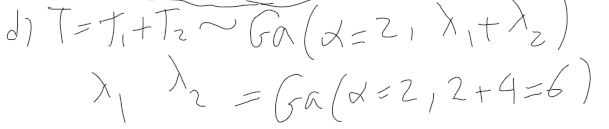

the alpha is the number of nodes. so if you have say T1, T2, T3 then the alpha is 3. got it?

recall that SD is the sqrt of Variance
when looking for the ExpValue and SD of the distribution. also, ExpValue = alpha/lambda and Variance = alpha/lambda^2 while SD is the sqrt of Variance.
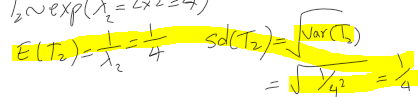

## **Hypothesis Testing**

## **GLM**

In [ ]:
%%R
head(swiss)

      Location Fertility Agriculture Examination Education Catholic
1   Courtelary      80.2        17.0          15        12     9.96
2     Delemont      83.1        45.1           6         9    84.84
3 Franches-Mnt      92.5        39.7           5         5    93.40
4      Moutier      85.8        36.5          12         7    33.77
5   Neuveville      76.9        43.5          17        15     5.16
6   Porrentruy      76.1        35.3           9         7    90.57
  Infant.Mortality
1             22.2
2             22.2
3             20.2
4             20.3
5             20.6
6             26.6


In [ ]:
%%R
model=glm(Fertility~Agriculture+Examination+Education+Catholic+Infant.Mortality, data=swiss, family='gaussian')
#a. estimate the parameters of the model
print(coef(model))
#b. specify the significat independent varibles at alpha=0.01 (that will be Edu, Cath & Infant.Mort)
summary(model)


     (Intercept)      Agriculture      Examination        Education 
      66.9151817       -0.1721140       -0.2580082       -0.8709401 
        Catholic Infant.Mortality 
       0.1041153        1.0770481 

Call:
glm(formula = Fertility ~ Agriculture + Examination + Education + 
    Catholic + Infant.Mortality, family = "gaussian", data = swiss)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-15.2743   -5.2617    0.5032    4.1198   15.3213  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.91518   10.70604   6.250 1.91e-07 ***
Agriculture      -0.17211    0.07030  -2.448  0.01873 *  
Examination      -0.25801    0.25388  -1.016  0.31546    
Education        -0.87094    0.18303  -4.758 2.43e-05 ***
Catholic          0.10412    0.03526   2.953  0.00519 ** 
Infant.Mortality  1.07705    0.38172   2.822  0.00734 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian fa

In [ ]:
#c. find the predicted values if independent variables are - agric=12, exam=14, edu=3, cath=9, infant=4.6
%%R
swiss_new=c(1,0,0,3,9,8.9) #the non significnt values are assigend 0 while the significant variables go with the flow
pred=sum(swiss_new*coef(model))
pred

[1] 74.82513


## **#testing my skills on predictions using R and GLM**

In [5]:
%%R
data=read.csv('/content/20221208 Data.csv')
head(data)

  EntryAge PlanID Status MaturityDate Duration Sex     SumAssured Rating Height
1       18      3      2     1-Feb-23        1   2    500,000.00       1   0.00
2       18      1      1     1-Aug-23        2   1    500,000.00       1   1.60
3       18     11      2     1-Jun-36       15   2  8,495,196.00       1   1.60
4       18     11      2     1-Jun-36       15   2  5,658,585.00       1   1.63
5       18      1      1     1-Jul-23        2   2    500,000.00       1   1.68
6       18     11      9     1-Nov-36       15   2  2,164,000.00       1   1.68
  Weight
1      0
2     65
3     63
4     65
5     50
6     60


In [17]:
%%R
df=na.omit(data)
head(df)
print(nrow(df))
model=glm(Status~PlanID+Duration+Sex+EntryAge+Rating, data=df, family='gaussian')
coef(model)
print(summary(model))

#model evalulation
set.seed(134)
row_count=nrow(df)
data_split=sample(row_count,row_count*(80/100))
train_data=df[data_split,]
test_data=df[-data_split,]

#fitting the model on the trainset
model=glm(Status~PlanID+Duration+Sex+EntryAge+Rating, data=train_data, family='gaussian')

#predicting the testset
prediction=predict(model,test_data)
actual=test_data$Status
mse=sum((prediction-actual)^2)/nrow(test_data)
rmse=sqrt(mse)
rmse

##trying the confusion matrix
#conf_mat=table(prediction[,3],actual=test_data[,3])
#conf_mat

[1] 49779

Call:
glm(formula = Status ~ PlanID + Duration + Sex + EntryAge + Rating, 
    family = "gaussian", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5772  -2.5277  -0.0073   3.2240   5.6941  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.712991   0.086158  54.701  < 2e-16 ***
PlanID       0.135380   0.004638  29.191  < 2e-16 ***
Duration     0.054795   0.003555  15.413  < 2e-16 ***
Sex         -0.167099   0.029209  -5.721 1.07e-08 ***
EntryAge    -0.028003   0.001529 -18.315  < 2e-16 ***
Rating      -0.072840   0.008754  -8.321  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 8.655483)

    Null deviance: 465879  on 49778  degrees of freedom
Residual deviance: 430809  on 49773  degrees of freedom
AIC: 248707

Number of Fisher Scoring iterations: 2

[1] 2.930365


## **Time Series Analysis**